# Informed and Uninformed search problem

## Introduction
Search algorithms play a crucial role in many areas of computer science and artificial intelligence, particularly in pathfinding and graph traversal tasks. This lab focuses on implementing four fundamental search algorithms:

Uninformed Search Strategies:
- Depth-First Search (DFS)
- Breadth-First Search (BFS)

Informed Search Strategies:
- Uniform Cost Search (UCS)
- A* Search

Students will apply these algorithms to a grid-based navigation problem, identifying the most efficient path from a start point to a goal point while avoiding obstacles.

## Environment Setup:

Implement a environment class to model the navigation environment as a 2D grid.
The grid should include obstacles, a start point (S), and a goal point (G).
Implement Search Algorithms:

Implement the DFS and BFS algorithms to explore the grid.
Implement the UCS and A* Search algorithms, utilizing cost functions and heuristics to find optimal paths.

Visualization:

Use a visualization library (e.g., matplotlib) to visually represent the grid, the obstacles, and the paths found by each algorithm.

## Environment Class

In [1]:
class Environment:
    def __init__(self, width, height, obstacles, start, goal):
        self.width = width
        self.height = height
        self.obstacles = obstacles  # List of tuples (x, y)
        self.start = start  # Tuple (x, y)
        self.goal = goal  # Tuple (x, y)
        self.grid = self.initialize_grid()

    def initialize_grid(self):
        grid = [[0 for _ in range(self.width)] for _ in range(self.height)]
        for obstacle in self.obstacles:
            grid[obstacle[1]][obstacle[0]] = -1  # Mark obstacles
        grid[self.start[1]][self.start[0]] = 'S'  # Mark start
        grid[self.goal[1]][self.goal[0]] = 'G'  # Mark goal
        return grid

    def is_valid_move(self, x, y):
        if 0 <= x < self.width and 0 <= y < self.height and self.grid[y][x] != -1:
            return True
        return False

    def get_neighbors(self, x, y):
        neighbors = []
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:  # Left, Right, Up, Down
            nx, ny = x + dx, y + dy
            if self.is_valid_move(nx, ny):
                neighbors.append((nx, ny))
        return neighbors


## Agent Class

In [2]:
class Agent:
    def __init__(self, environment):
        self.environment = environment

    def breadth_first_search(self):
        # Implement BFS to find path from start to goal
        pass

    def depth_first_search(self):
        # Implement DFS to find path from start to goal
        pass

    def uniform_cost_search(self):
        # Implement UCS to find path from start to goal
        pass

    def a_star_search(self):
        # Implement A* to find path from start to goal
        pass


## Integration and Usage

In [3]:
# Example setup
obstacles = [(1, 2), (2, 2), (3, 2)]  # Define obstacles as a list of (x, y) tuples
start = (0, 0)
goal = (4, 4)
env = Environment(5, 5, obstacles, start, goal)
agent = Agent(env)

# Example call to a search method
path = agent.breadth_first_search()  # Replace with desired method


# Agent Class with a BFS Example

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

# Node Class represents a state in the search tree.
class Node:
    def __init__(self, state, parent=None, action=None, path_cost=0):
        self.state = state  # The current position of the agent in the grid.
        self.parent = parent  # The node in the search tree that generated this node.
        self.action = action  # The action taken to get to this state.
        self.path_cost = path_cost  # Cost from the start node to this node.

    # Comparison operator for priority queue.
    def __lt__(self, other):
        return self.path_cost < other.path_cost


In [15]:
# Environment Class represents the grid and handles state transitions.
class Environment:
    def __init__(self, grid, start, goal):
        self.grid = grid  # The grid layout where 1 represents an obstacle and 0 is free space.
        self.initial = start  # Starting position of the agent.
        self.goal = goal  # Goal position the agent aims to reach.

    # Returns the possible actions from a given state.
    def actions(self, state):
        possible_actions = ['UP', 'DOWN', 'LEFT', 'RIGHT']
        x, y = state

        # Remove impossible actions based on grid boundaries and obstacles.
        if x == 0 or self.grid[x - 1][y] == 1:
            possible_actions.remove('UP')
        if x == len(self.grid) - 1 or self.grid[x + 1][y] == 1:
            possible_actions.remove('DOWN')
        if y == 0 or self.grid[x][y - 1] == 1:
            possible_actions.remove('LEFT')
        if y == len(self.grid[0]) - 1 or self.grid[x][y + 1] == 1:
            possible_actions.remove('RIGHT')

        return possible_actions

    # Returns the state resulting from taking a given action at a given state.
    def result(self, state, action):
        x, y = state
        if action == 'UP':
            return (x - 1, y)
        if action == 'DOWN':
            return (x + 1, y)
        if action == 'LEFT':
            return (x, y - 1)
        if action == 'RIGHT':
            return (x, y + 1)

    # Checks if the goal has been reached.
    def is_goal(self, state):
        return state == self.goal

In [16]:
# Agent Class uses BFS to find a path from start to goal.
class Agent:
    def __init__(self, env):
        self.env = env  # The environment in which the agent operates.

    # Performs BFS search to find a path from the initial state to the goal.
    def bfs_search(self):
        frontier = deque([Node(self.env.initial)])  # FIFO queue for BFS.
        came_from = {self.env.initial: None}  # Tracks how we reached each node.

        while frontier:
            current_node = frontier.popleft()

            if self.env.is_goal(current_node.state):
                return self.reconstruct_path(came_from, current_node.state)

            for action in self.env.actions(current_node.state):
                new_state = self.env.result(current_node.state, action)
                if new_state not in came_from:
                    frontier.append(Node(new_state, current_node, action))
                    came_from[new_state] = current_node.state

        return []

    # Reconstructs the path from start to goal by following the came_from links.
    def reconstruct_path(self, came_from, current):
        path = []
        while current in came_from:
            path.append(current)
            current = came_from[current]
        path.append(self.env.initial)  # Start is not included in the came_from map.
        path.reverse()  # Reverse to get the path from start to goal.
        return path


In [17]:
# Visualization Function plots the grid and the found path.
def visualize_grid_and_path(grid, path):
    grid_array = np.array(grid)  # Convert grid to numpy array for easy plotting.
    fig, ax = plt.subplots()
    ax.imshow(grid_array, cmap='Greys', alpha=0.3)  # Grid background.
    start = path[0]
    goal = path[-1]
    ax.plot(start[1], start[0], 'bs', markersize=10)  # Start position in blue.
    ax.plot(goal[1], goal[0], 'gs', markersize=10)  # Goal position in green.
    xs, ys = zip(*path)  # Extract X and Y coordinates of the path.
    ax.plot(ys, xs, 'r-', linewidth=2)  # Plot the path in red.
    ax.set_xticks(np.arange(-.5, len(grid[0]), 1), minor=True)
    ax.set_yticks(np.arange(-.5, len(grid), 1), minor=True)
    ax.grid(which="minor", color="b", linestyle='-', linewidth=1)
    ax.tick_params(which="minor", size=0)
    ax.tick_params(which="major", bottom=False, left=False, labelbottom=False, labelleft=False)
    plt.show()

Solution Path: [(0, 0), (0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (3, 2), (4, 2), (4, 3), (4, 4)]


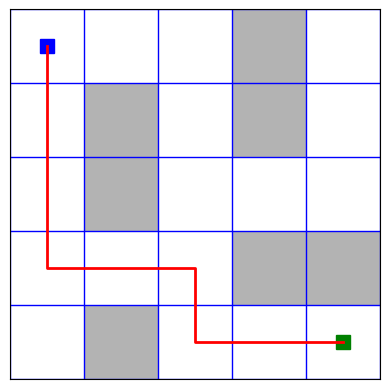

In [19]:
# Define the grid, start position, and goal position
grid = [
    [0, 0, 0, 1, 0],
    [0, 1, 0, 1, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 0, 1, 1],
    [0, 1, 0, 0, 0]
]

start = (0, 0)
goal = (4, 4)

# Create the environment and agent
environment = Environment(grid, start, goal)
agent = Agent(environment)

# Solve the problem with BFS
solution_path = agent.bfs_search()
print("Solution Path:", solution_path)

# Visualize the solution
visualize_grid_and_path(grid, solution_path)